# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

# Analysis of Graduate Admissions
### Predicting admission from important parameters

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis and Results](#analysisandresults)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

In this project we will try to find what parameters are important for a student to get into a graduate school. Students will submit many materials when applying for graduation schools, such as English score (GRE and Toefl), statement of purpose, GPA, letter of recommendation and research work. All of the requested materials will influence the chance of admission. In addition, university rating also had an influence on admission. Therefore, it's necessary for us to analyze different components' influences on the chance of graduate school admission.

## Data <a name="data"></a>

The data created for prediction of Graduate Admissions can be found in Kaggle datasets <a href="https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict.csv">(here)</a>. The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores (out of 340) 2. TOEFL Scores (out of 120) 3.University Rating (out of 5) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience (either 0 or 1) 7.Chance of Admit (ranging from 0 to 1). 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
from matplotlib import pyplot

#### Data Acquisition

In [3]:
df=pd.read_csv('Admission_Predict_Ver.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'})

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

#### check null value

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Since outliers have large effect on prediction, I will delete the outlier numbers. I used the Tukey method to detect ouliers which defines an interquartile range comprised between the 1st and 3rd quartile of the distribution values (IQR). An outlier is a row that have a feature value outside the (IQR +- an outlier step).

Here I detected outliers from the numerical values features (GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research). And I considered outliers as rows that have at least three outlied numerical values.

In [9]:
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   
outliers_to_drop=detect_outliers(df,3,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research'])

In [10]:
df.loc[outliers_to_drop]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [17]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Methodology <a name="methodology"></a>

In this project we will direct our efforts on figuring out which parameters are important for getting admission into graduate school. 

## Analysis and Results <a name="Analysisandresults"></a>

#### We could check how the columns correlated with each other

In [11]:
data_gra = df.drop(labels = 'Serial No.', axis = 1)
data_gra.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


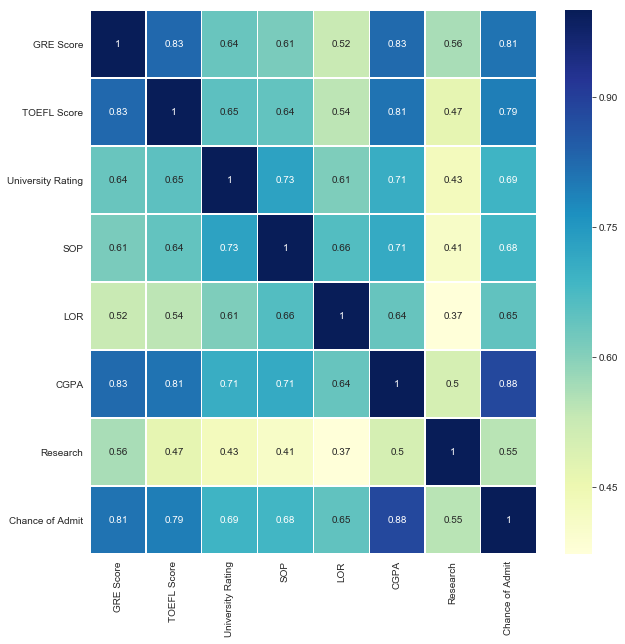

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data_gra.corr(),cmap='YlGnBu',annot=True,linewidths=0.4,)

The heatmap shows that CGPA is highly correlated with the chance of admit. In addition, GRE and TOEFL score are also highly correlated with chance of admit.

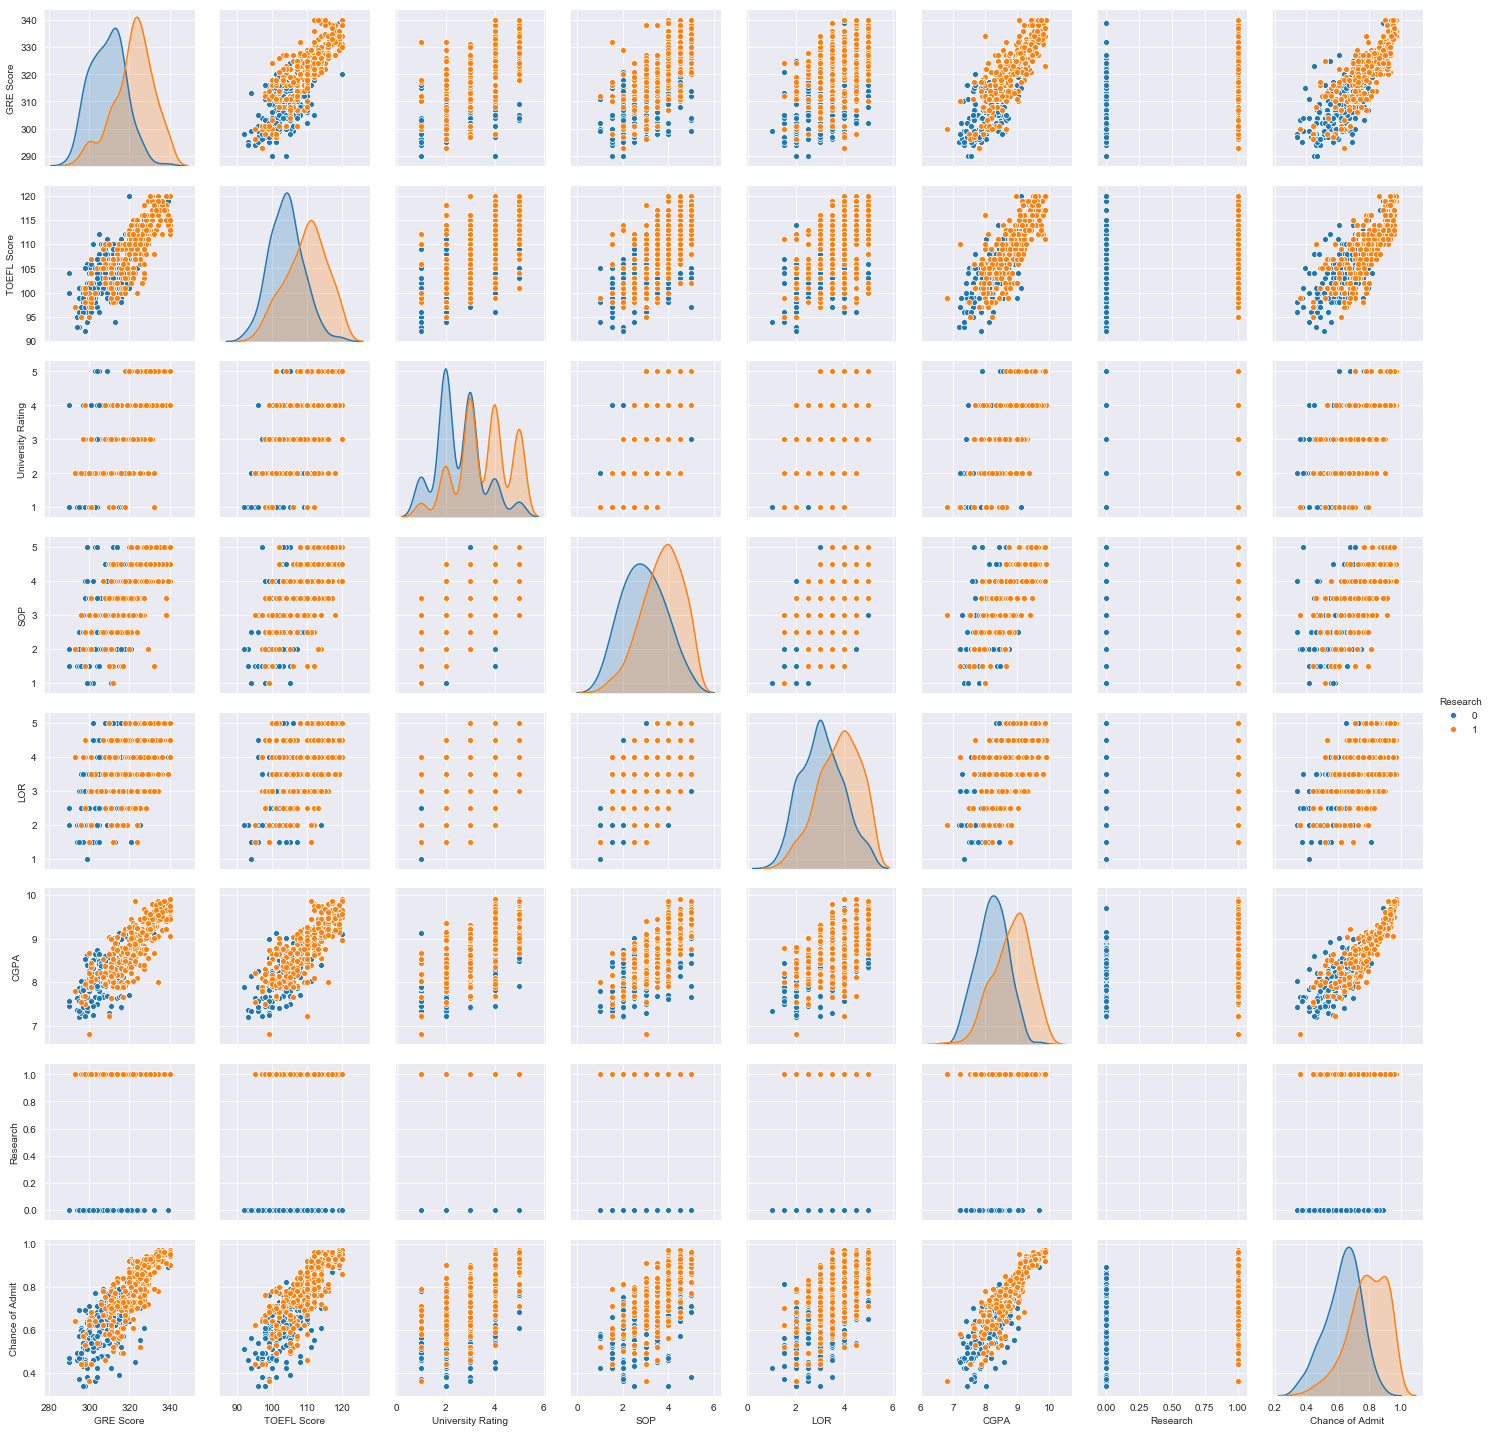

In [16]:
sns.pairplot(data=data_gra, hue = 'Research')